In [11]:
import sys

sys.path.append('..')
import matplotlib.pyplot as plt
from src.preprocessing import *
from src.stats import *
from src.transformation import *

plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)
import warnings

warnings.filterwarnings('ignore')

In [12]:
# Read the data
df = pd.read_csv('../dataset/breast-cancer-wisconsin.data')

In [13]:
# Drop Unnamed: 32 column and id column
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [14]:
# Encode the diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [15]:
# Split the data into X and y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [18]:
# Local Outlier Factor
threshold, scores, index_of_outliers = local_outlier_factor(df, 20, 0.1, -2)

In [19]:
len(index_of_outliers)

5

In [20]:
index_of_outliers

[38, 101, 212, 265, 461]

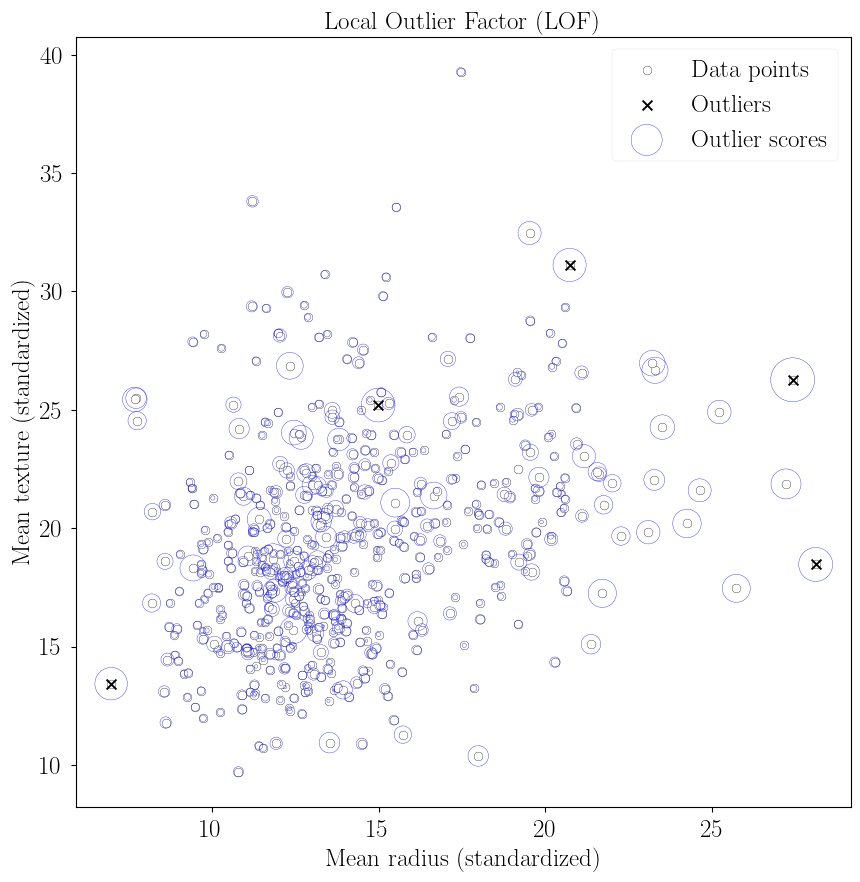

In [21]:
# Plot
plt.subplots(figsize=(10, 10))
plt.title('Local Outlier Factor (LOF)')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], edgecolors='black', facecolors='white', s=40., label='Data points')
plt.scatter(X.iloc[index_of_outliers, 0], X.iloc[index_of_outliers, 1], edgecolors='black', facecolors='black', s=50, marker='x',
            label='Outliers')
radius = (scores.max() - scores) / (scores.max() - scores.min())
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=1000 * radius, edgecolors='blue',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlabel('Mean radius (standardized)')
plt.ylabel('Mean texture (standardized)')
plt.legend()
plt.savefig('../plots/lof.png')
plt.show()

In [22]:
X_new = X.drop(index_of_outliers, axis=0)
y_new = y.drop(index_of_outliers, axis=0)

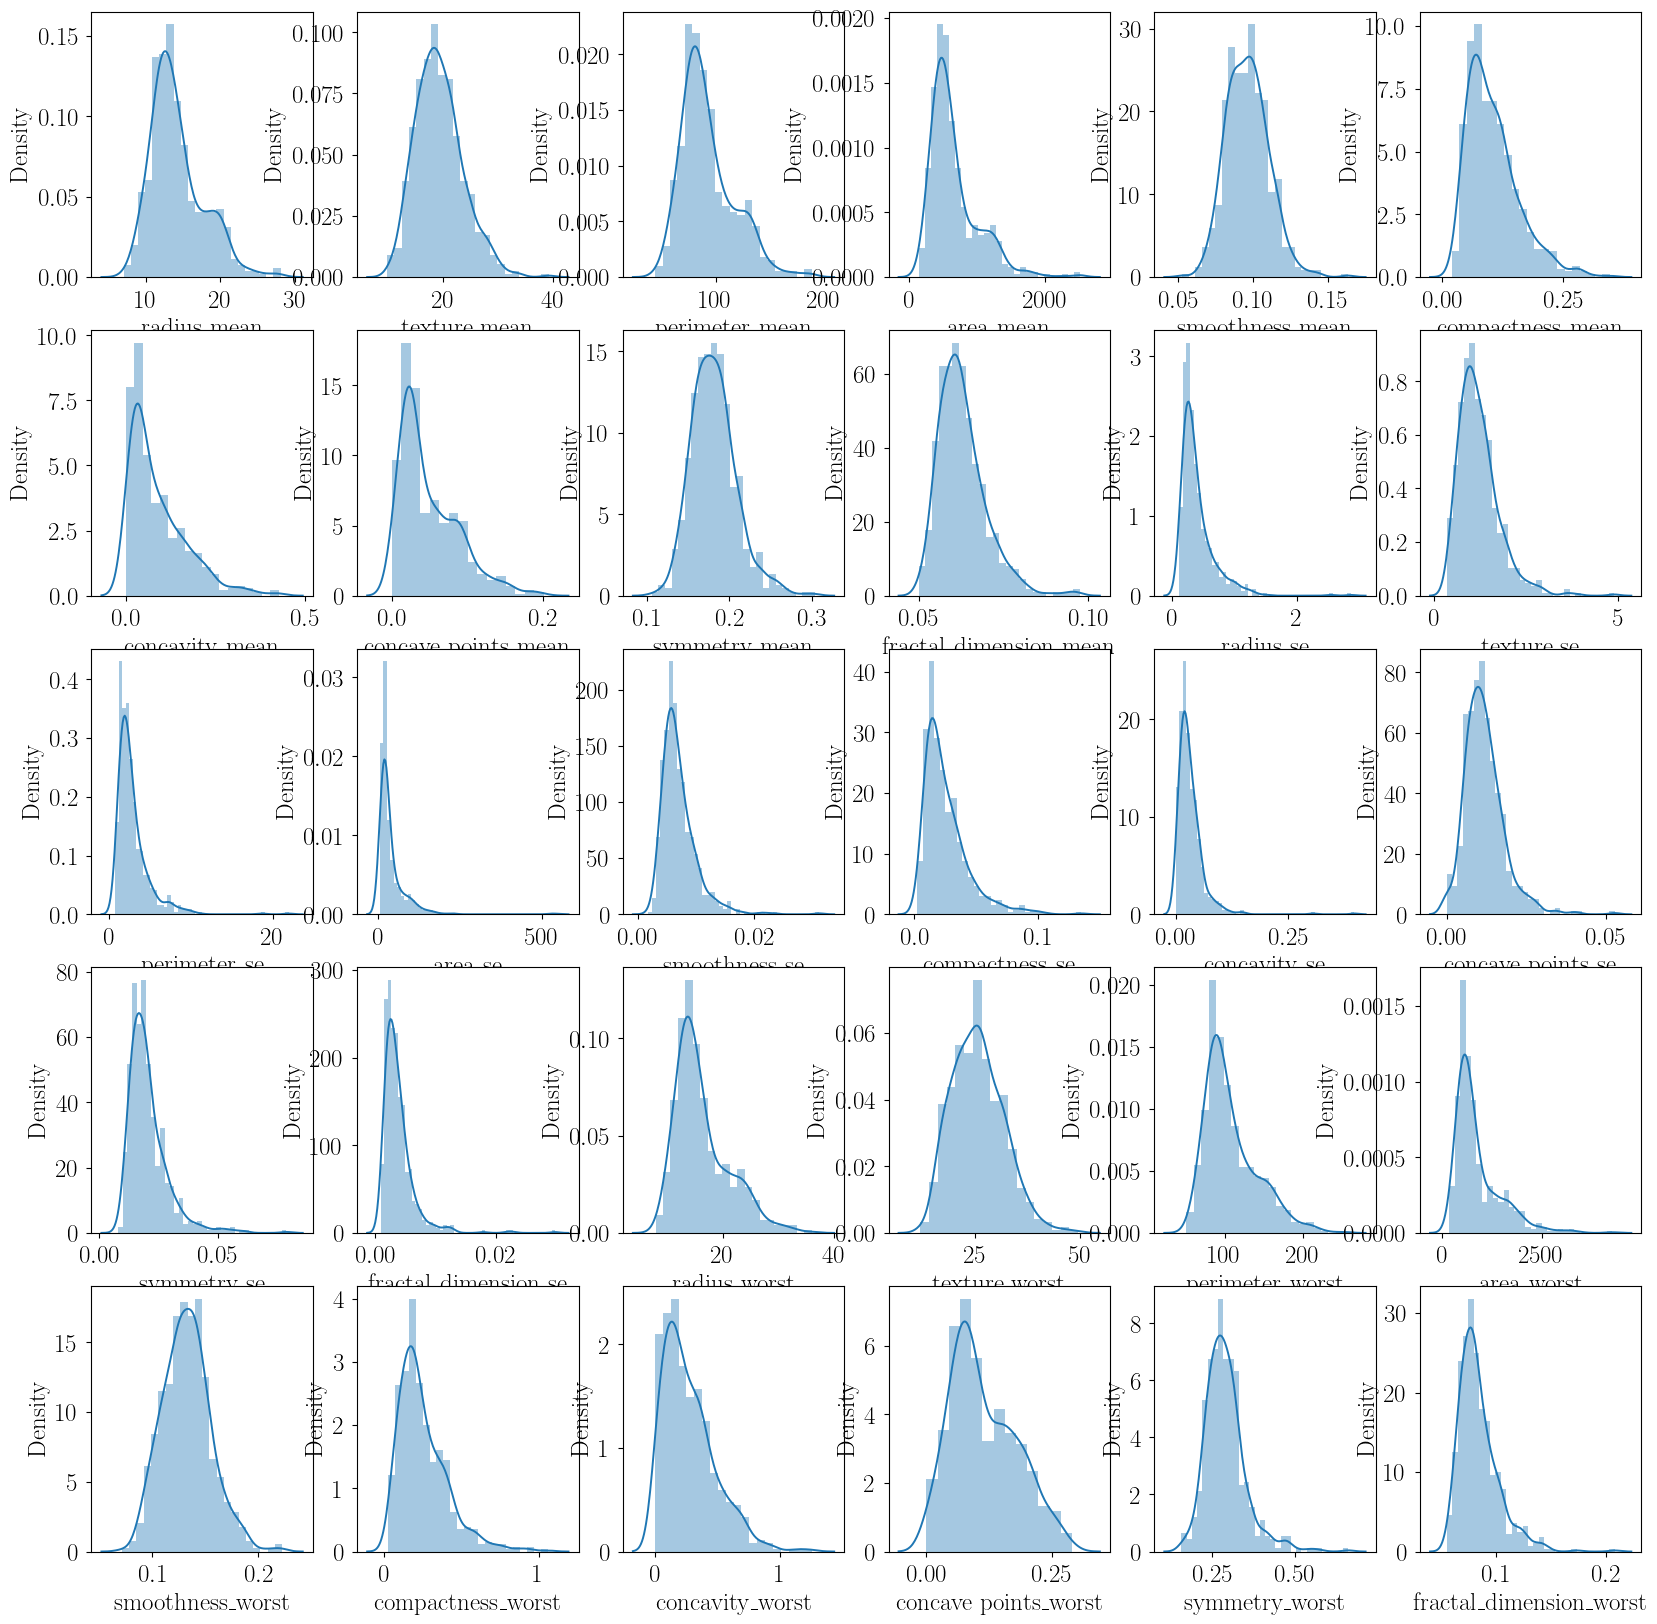

In [23]:
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X.columns, ax.flatten()):
    sns.distplot(X[variable], ax=subplot)
plt.savefig('../plots/distribution.png')
plt.show()

In [24]:
# Transformation to log_transformation :
# 'texture_mean', 'smoothness_mean', 'smoothness_worst'
# Transformation to cube root :
# 'compactness_worst', 'concavity_worst', 'texture_worst', 'smoothness_se', 'symmetry_mean', 'compactness_mean'
X_new = log_transformation(X_new, ['texture_mean', 'smoothness_mean', 'smoothness_worst'])
X_new = cube_root_transformation(X_new, ['compactness_worst',
                                         'concavity_worst',
                                         'texture_worst',
                                         'smoothness_se',
                                         'symmetry_mean',
                                         'compactness_mean'])

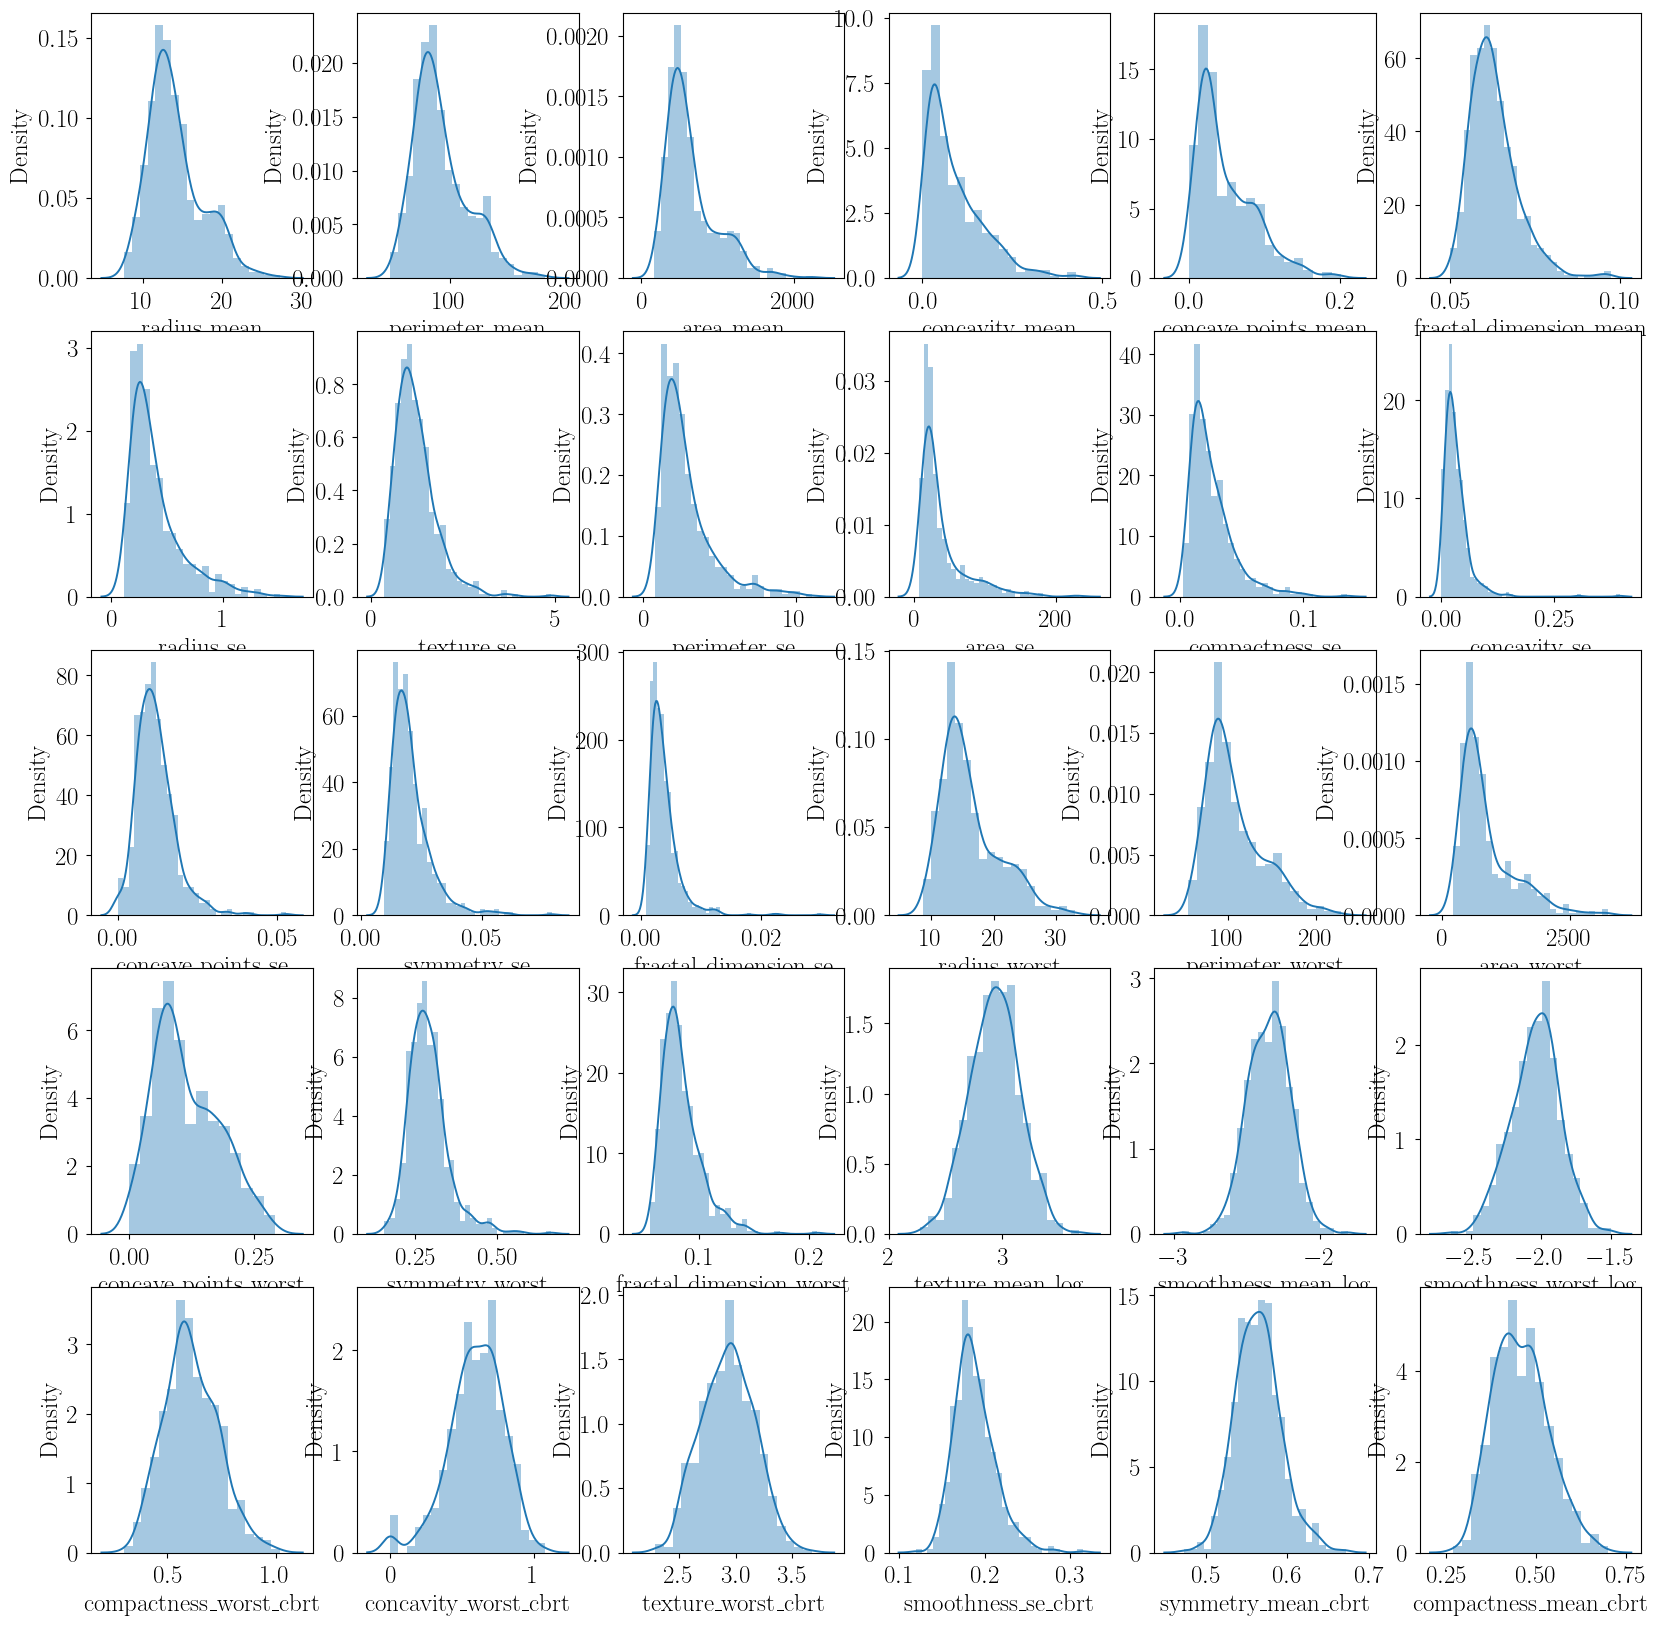

In [25]:
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X_new.columns, ax.flatten()):
    sns.distplot(X_new[variable], ax=subplot)
plt.savefig('../plots/distribution_after_transformation.png')
plt.show()

In [26]:
print(check_normality(X_new))

                              p-value     normality
radius_mean              1.328093e-13  Not Gaussian
perimeter_mean           3.439536e-14  Not Gaussian
area_mean                9.565207e-21  Not Gaussian
concavity_mean           2.523522e-21  Not Gaussian
concave points_mean      2.264177e-19  Not Gaussian
fractal_dimension_mean   2.586046e-16  Not Gaussian
radius_se                1.212281e-23  Not Gaussian
texture_se               2.756654e-19  Not Gaussian
perimeter_se             6.523268e-25  Not Gaussian
area_se                  3.927452e-29  Not Gaussian
compactness_se           1.309090e-23  Not Gaussian
concavity_se             1.070699e-31  Not Gaussian
concave points_se        5.392790e-17  Not Gaussian
symmetry_se              3.022285e-24  Not Gaussian
fractal_dimension_se     1.107828e-30  Not Gaussian
radius_worst             4.928729e-17  Not Gaussian
perimeter_worst          4.500725e-17  Not Gaussian
area_worst               8.396892e-24  Not Gaussian
concave poin

In [27]:
# Gaussian list
gaussian_list = ['texture_mean_log', 'smoothness_mean_log', 'smoothness_worst_log', 'texture_worst_cbrt']
non_gaussian_list = X_new.columns.drop(gaussian_list)
print(non_gaussian_list)
print(gaussian_list)

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'compactness_worst_cbrt', 'concavity_worst_cbrt', 'smoothness_se_cbrt',
       'symmetry_mean_cbrt', 'compactness_mean_cbrt'],
      dtype='object')
['texture_mean_log', 'smoothness_mean_log', 'smoothness_worst_log', 'texture_worst_cbrt']


In [28]:
X_new = standardize(X_new, gaussian_list)
X_new = normalize(X_new, non_gaussian_list)

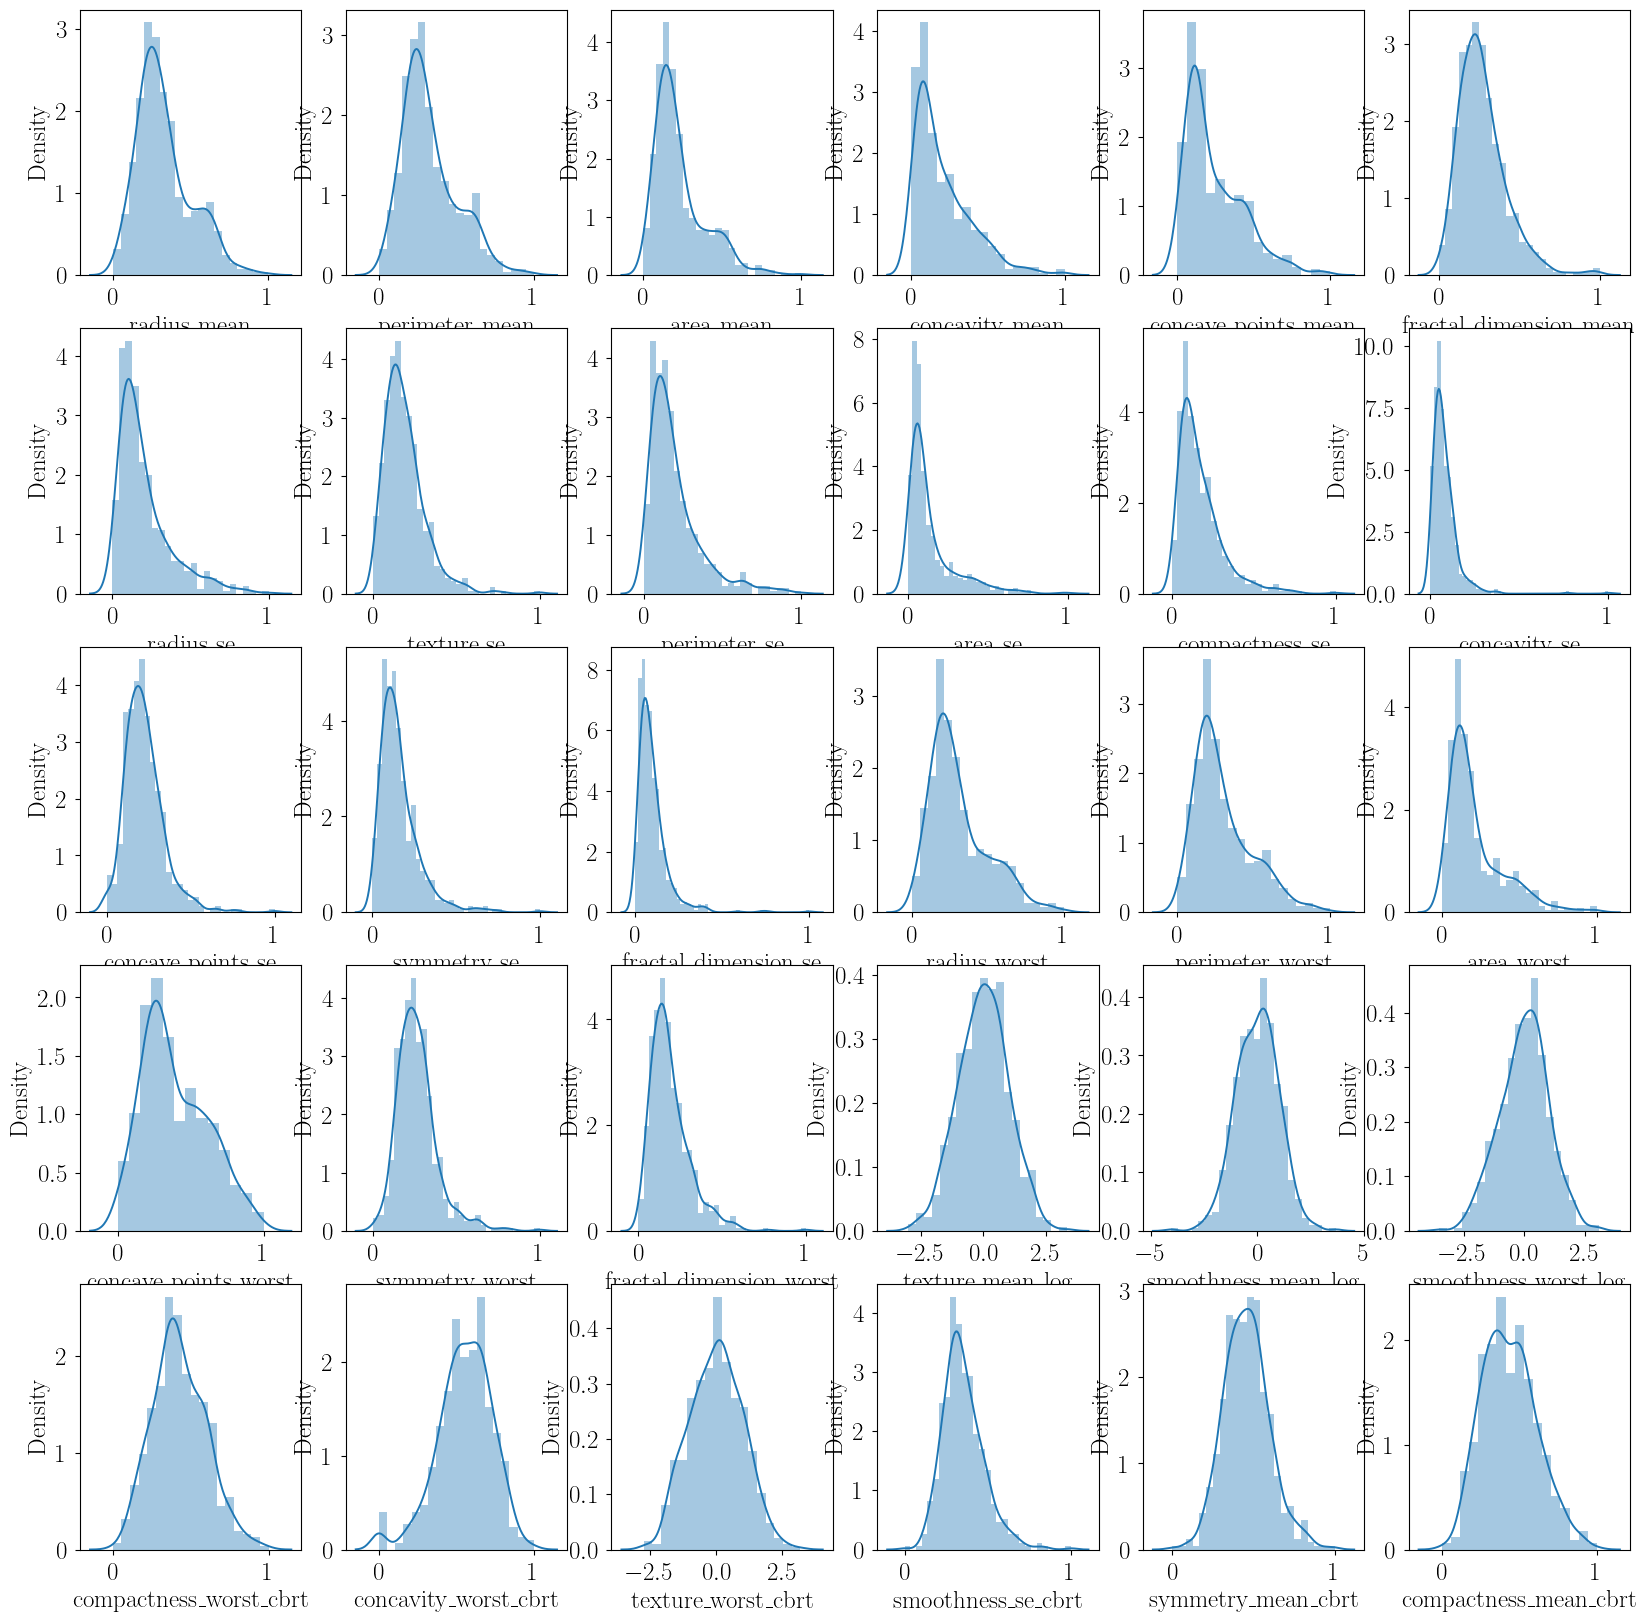

In [31]:
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X_new.columns, ax.flatten()):
    sns.distplot(X_new[variable], ax=subplot)
plt.savefig('../plots/distribution_normalized_standardized.png')
plt.show()

In [32]:
# Export the data to csv
X_new.to_csv('../dataset/breast-cancer-wisconsin-processed.csv', index=False)
y_new.to_csv('../dataset/breast-cancer-wisconsin-processed-label.csv', index=False)